In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

In [3]:
def U_analytical(x, t=1):
    return np.sin(x) + np.log(1 + (x - t)**2)

<IPython.core.display.Javascript object>


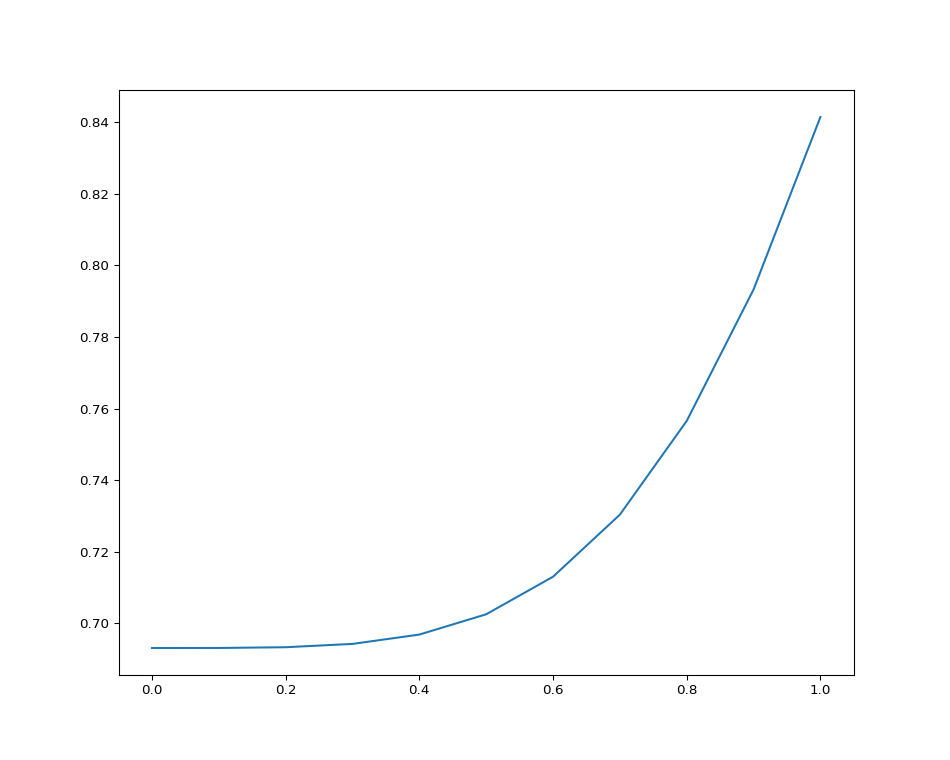

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

grid = np.linspace(0, 1, 11)

ax.plot(grid, U_analytical(grid))

In [5]:
U_analytical(grid)

array([0.69314718, 0.69316026, 0.69336557, 0.69429633, 0.69690304,
       0.70256909, 0.71306248, 0.73039538, 0.7565768 , 0.79327724,
       0.84147098])

Значения в 11 равноудаленных точках:

 Grid  Model analytical  Model numerical
  0.0          0.693147         0.693147
  0.1          0.693160         0.693139
  0.2          0.693366         0.693281
  0.3          0.694296         0.694109
  0.4          0.696903         0.696572
  0.5          0.702569         0.702056
  0.6          0.713062         0.712331
  0.7          0.730395         0.729412
  0.8          0.756577         0.755309
  0.9          0.793277         0.791696
  1.0          0.841471         0.839551

Max diff:	0.0019202766882735478



<IPython.core.display.Javascript object>


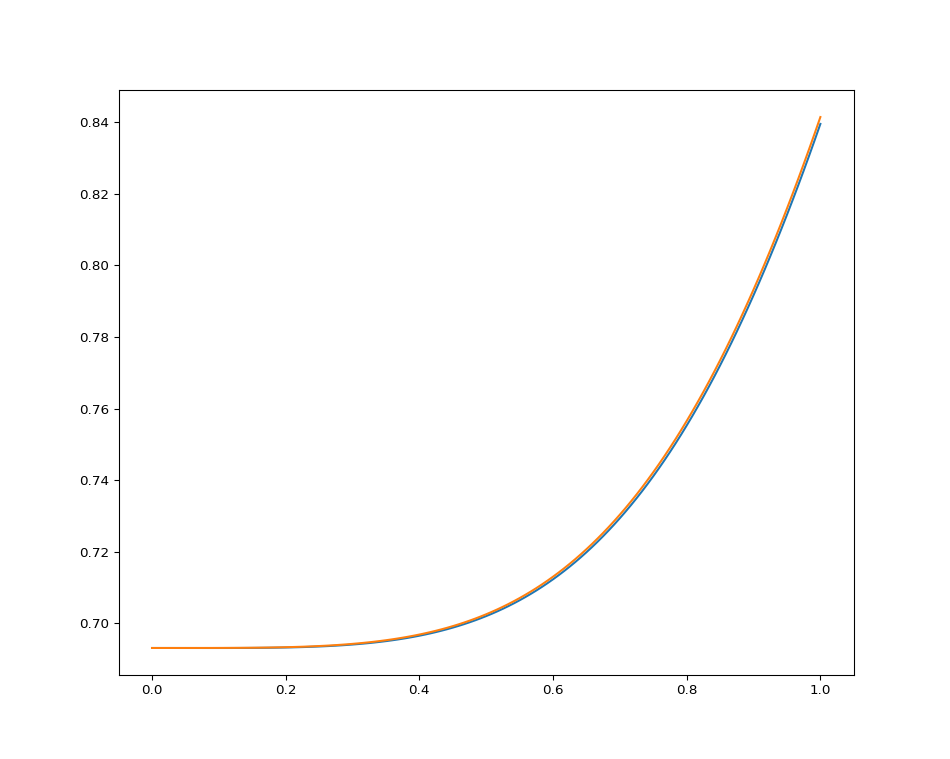

In [6]:
L = 121
K = 1
N = int((L - 1) / K) + 1

xs, h = np.linspace(0, 1, L, retstep=True)
ts, dt = np.linspace(0, 1, N, retstep=True)

U = [(np.log(1 + xs**2) + np.sin(xs))]

for n, t in enumerate(ts[1:]):
    U_0 = np.log(1 + t**2)
    U_next = U[n][1:] - dt / h * np.diff(U[n]) + dt * np.cos(xs[1:])
    U.append(np.insert(U_next, 0, U_0))

u_a = U_analytical(xs)
u_model = U[-1]
max_diff = np.abs(u_model - u_a).max()

step_for_output = (L - 1) // 10
df = pd.DataFrame(
    {
        'Grid': xs[::step_for_output],
        'Model analytical': u_a[::step_for_output],
        'Model numerical': u_model[::step_for_output],
    }
)
print('Значения в 11 равноудаленных точках:\n')
print(df.to_string(index=False))
print(f'\nMax diff:\t{max_diff}\n')

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(xs, U[-1])
ax.plot(xs, U_analytical(xs))

In [7]:
def U_analytical(x, t=1):
    return np.cos(x + 2*t)

Значения в 11 равноудаленных точках:

 Grid  Model analytical  Model numerical
  0.0         -0.416147    8.933762e+104
  0.1         -0.504846     7.339136e+98
  0.2         -0.588501     9.865788e+91
  0.3         -0.666276     1.862768e+84
  0.4         -0.737394     4.013353e+75
  0.5         -0.801144     7.382278e+65
  0.6         -0.856889     7.590090e+54
  0.7         -0.904072     2.243886e+42
  0.8         -0.942222     5.863935e+27
  0.9         -0.970958     9.200417e+09
  1.0         -0.989992    -1.083924e+00

Max diff:	8.933762306756219e+104



<IPython.core.display.Javascript object>


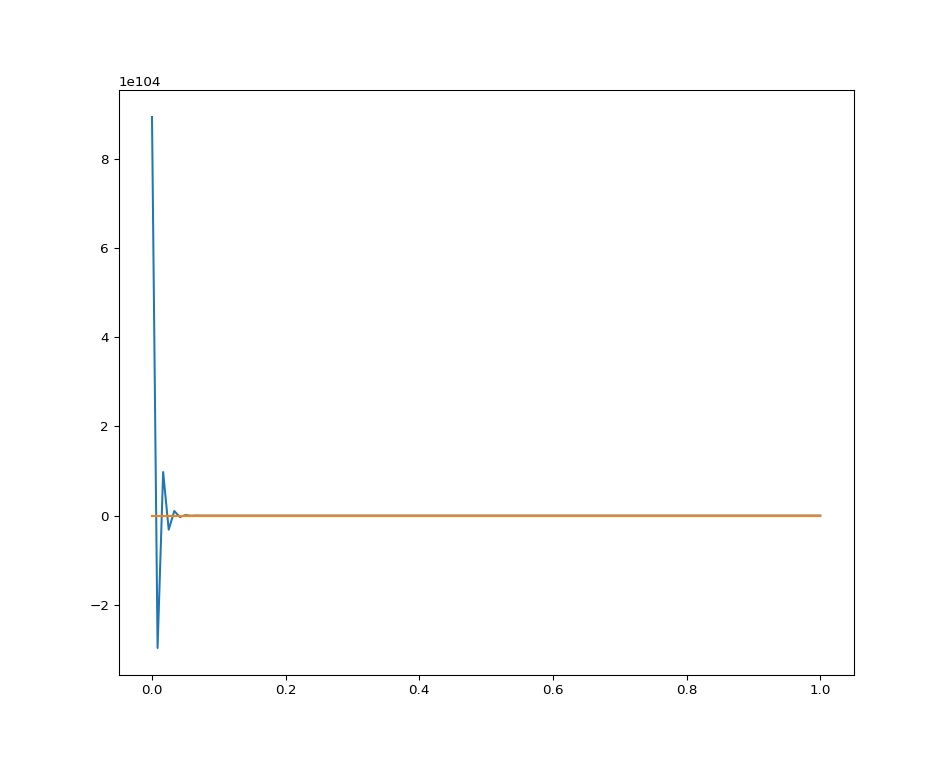

In [45]:
L = 121
K = 1
N = int((L - 1) / K) + 1

xs, h = np.linspace(0, 1, L, retstep=True)
ts, dt = np.linspace(0, 1, N, retstep=True)

U = [np.sin(xs) - 0.125*xs**2]

for n, t in enumerate(ts[1:]):
    U_L = np.sin(1 + 4*t) - 0.125
    U_L1 = U_L - (np.cos(1+4*t) - 1/4) * h + (-np.sin(1+4*t) -1/4) * h**2 / 2 + np.cos(1 + 4*t) * h**3 / 6
    U_L2 = U_L - (np.cos(1 + 4*t) - 1/4) * 2*h + (-np.sin(1 + 4*t) - 1/4) * 2*h**2 + np.cos(1 + 4*t) * 4*h**3 /3

    U_l3 = U[n][3:]
    U_l2 = U[n][2:-1]
    U_l1 = U[n][1:-2]
    U_l = U[n][:-3]

    S1 = 2*U_l3 - 9*U_l2 + 18*U_l1 - 11*U_l
    S2 = -U_l3 + 4*U_l2 - 5*U_l1 + 2*U_l
    S3 = U_l3 - 3*U_l2 + 3*U_l1 - U_l

    U_next = U_l + 2*dt/(3 * h) * S1 + (8 * dt**2)/h**2 * S2 + (32 * dt**3)/(3 * h**3) * S3 + 2*dt**2 + dt*xs[:-3]
    U.append(np.hstack([U_next, [U_L2, U_L1, U_L]]))
    
u_a = U_analytical(xs)
u_model = U[-1]
max_diff = np.abs(u_model - u_a).max()

step_for_output = (L - 1) // 10
df = pd.DataFrame(
    {
        'Grid': xs[::step_for_output],
        'Model analytical': u_a[::step_for_output],
        'Model numerical': u_model[::step_for_output],
    }
)
print('Значения в 11 равноудаленных точках:\n')
print(df.to_string(index=False))
print(f'\nMax diff:\t{max_diff}\n')

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(xs, U[-1])
ax.plot(xs, U_analytical(xs))

In [46]:
X, Y = np.meshgrid(ts, xs)
Z = np.array(U)

<IPython.core.display.Javascript object>


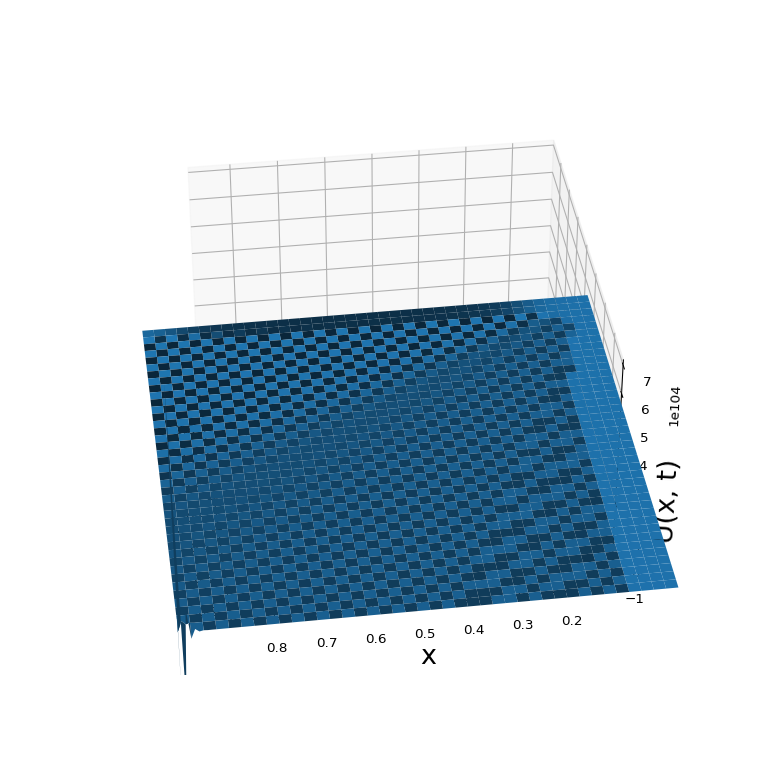

Text(0.5, 0, 'U(x, t)')

In [47]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('t', fontsize=20)
ax.set_ylabel('x', fontsize=20)
ax.set_zlabel('U(x, t)', fontsize=20)